# Dark Chocolate Bars and Iron

The purpose of this project is to analyze dark chocolate bars and their iron content. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import sklearn
from sklearn import linear_model

In [2]:
#load spreadsheet
chocolate = pd.read_excel('Documents/MCDataBootCamp/Personal project/chocolatebars.xlsx')

In [3]:
#check dimensions
chocolate.shape

(225, 12)

In [4]:
#show headers
#iron and total iron = (DV%)
#bar size = oz
#serving size = g
chocolate.head()

,Company,Cocoa Percent,Broad Bean Origin,Bean Type,Iron,Bar Size,Serving Size,Serving per bar,Roasted,Pure,Total Iron,Continent
0,Valrhona,85,Africa,Forastero,15.0,2.46,35.0,2.0,Y,Y,30.0,1
1,Chocolove,70,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.20,30.0,3.0,Y,Y,90.0,7
2,Chocolove,65,"African, Caribbean","Blend (forastero, trinitario)",25.0,3.20,30.0,3.0,Y,Y,75.0,7
3,Chocolove,88,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.20,30.0,3.0,Y,Y,90.0,7
4,Chocolove,55,"African, Caribbean","Blend (forastero, trinitario)",20.0,3.20,30.0,3.0,Y,Y,60.0,7


In [5]:
chocolate.describe()

,Cocoa Percent,Iron,Bar Size,Serving Size,Serving per bar,Total Iron,Continent
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,74.124444,16.435556,2.433067,33.272444,2.355556,30.237778,4.248889
std,11.038997,14.719244,0.670353,14.548547,1.410350,23.061214,2.167189
min,50.000000,1.000000,1.000000,2.500000,1.000000,4.000000,1.000000
25%,70.000000,6.000000,1.940000,25.000000,2.000000,12.000000,3.000000
50%,70.000000,11.000000,2.460000,35.000000,2.000000,20.000000,5.000000
75%,80.000000,23.000000,3.000000,42.000000,2.500000,45.000000,6.000000
max,100.000000,100.000000,4.400000,71.000000,9.000000,100.000000,8.000000


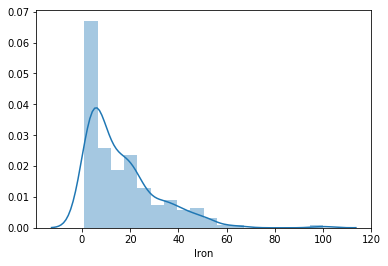

In [6]:
#distribution of iron daily values per serving size
sns.distplot(chocolate['Iron'])

In [7]:
#Foods providing 20% or more of the DV are considered to be high sources of a nutrient
#create bins to show normal vs high source of a nutrient
bins = [0, 19, 100]

#Create names for the groups
group_names = ['Normal', 'High']

#make new column 
chocolate['Source'] = pd.cut(chocolate['Iron'], bins, labels=group_names)
chocolate.head(10)

,Company,Cocoa Percent,Broad Bean Origin,Bean Type,Iron,Bar Size,Serving Size,Serving per bar,Roasted,Pure,Total Iron,Continent,Source
0,Valrhona,85,Africa,Forastero,15.0,2.46,35.0,2.0,Y,Y,30.0,1,Normal
1,Chocolove,70,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.20,30.0,3.0,Y,Y,90.0,7,High
2,Chocolove,65,"African, Caribbean","Blend (forastero, trinitario)",25.0,3.20,30.0,3.0,Y,Y,75.0,7,High
3,Chocolove,88,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.20,30.0,3.0,Y,Y,90.0,7,High
4,Chocolove,55,"African, Caribbean","Blend (forastero, trinitario)",20.0,3.20,30.0,3.0,Y,Y,60.0,7,High
5,Chocolove,77,"African, Caribbean","Blend (forastero, trinitario)",25.0,3.20,30.0,3.0,Y,Y,75.0,7,High
6,Askinosie,72,Amazonia,Nacional Arriba,6.0,3.00,42.5,2.0,Y,Y,12.0,4,Normal
7,Dick Taylor,72,Belize,Trinitario,4.0,2.00,28.0,2.0,Y,Y,8.0,4,Normal
8,Double Spiral,75,Belize,Trinitario,19.0,1.00,28.0,1.0,Y,Y,19.0,4,Normal
9,Glennmade,70,Belize,Trinitario,35.0,1.83,52.0,1.0,Y,Y,35.0,4,High


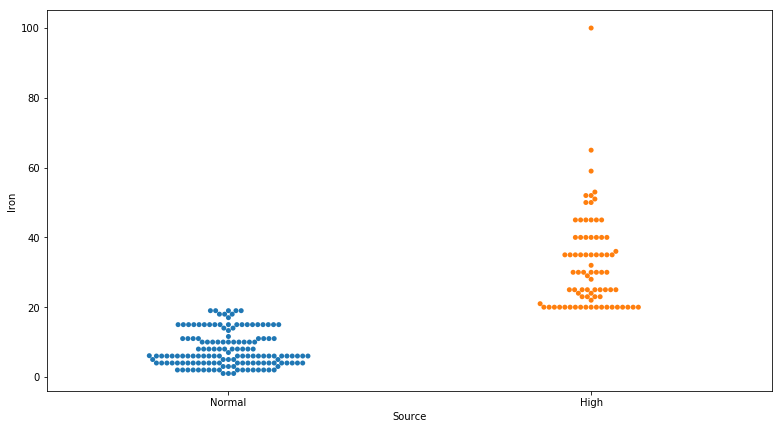

In [8]:
plt.figure(figsize=(13,7))
sns.swarmplot(x='Source', y='Iron', data=chocolate)

In [9]:
#mean of total iron by bean type
beans = chocolate.groupby('Bean Type')['Total Iron'].mean()
beans

Bean Type
Blend                                     70.000000
Blend (criollo, trinitario)               28.833333
Blend (criollo, trinitario, forastero)     4.000000
Blend (forastero, criollo)                15.333333
Blend (forastero, trinitario)             78.000000
Criollo                                   29.367647
Forastero                                 33.288462
Hispaniola                                19.666667
Nacional                                  27.500000
Nacional Arriba                           35.410256
Porcelana (criollo)                       27.500000
Trinitario                                27.296875
Trinitario, Nacional Arriba               16.000000
Name: Total Iron, dtype: float64

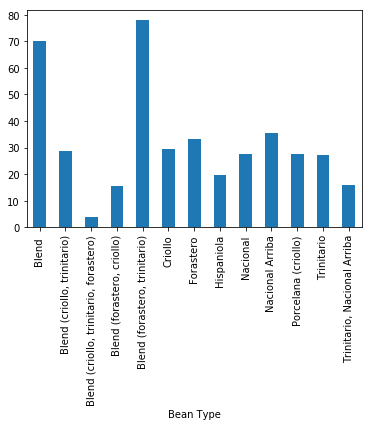

In [10]:
#visualization of mean of total iron by bean type
beans.plot.bar()

In [11]:
#mean of total iron by bean type
cocoa = chocolate.groupby('Cocoa Percent')['Total Iron'].mean()
cocoa

Cocoa Percent
50     42.500000
53     20.000000
54     11.000000
55     28.666667
58     20.000000
60     26.576923
62     30.000000
63     34.000000
64      8.500000
65     38.111111
66     15.333333
67     27.500000
68     22.000000
70     25.897059
71     44.000000
72     25.789474
74      6.000000
75     20.230769
76     24.400000
77     45.250000
78     15.000000
79      8.000000
80     29.777778
81     42.500000
82     10.000000
83     45.000000
85     37.568182
86     48.200000
87     32.000000
88     54.200000
90     55.833333
92     68.666667
100    39.413333
Name: Total Iron, dtype: float64

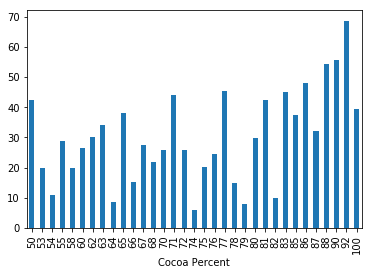

In [12]:
cocoa.plot.bar()

In [13]:
chocolate['Broad Bean Origin'].value_counts()

Ecuador                                 39
Dominican Republic                      36
Peru                                    26
Ghana                                   13
Madagascar                              13
Tanzania                                11
Venezuela                               10
Columbia                                 8
Unknown                                  6
West Africa                              5
Congo, Peru                              5
African, Caribbean                       5
Bolivia                                  5
Mexico                                   4
Costa Rica                               4
Brazil                                   4
Haiti                                    3
Belize                                   3
Nicaragua                                3
Vietnam                                  2
Uganda                                   2
Guatemala                                2
South America                            2
Cameroon   

In [14]:
#create bins for bean origin
bins2 = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Create names for the groups
group_names2 = ['Africa', 'Asia', 'Caribbean', 'Central America', 'North America', 'South America', 
               'Multi-country', 'Unknown']

#make new column to show the different regions
chocolate['Region'] = pd.cut(chocolate['Continent'], bins2, labels=group_names2)
chocolate.head(5)

,Company,Cocoa Percent,Broad Bean Origin,Bean Type,Iron,Bar Size,Serving Size,Serving per bar,Roasted,Pure,Total Iron,Continent,Source,Region
0,Valrhona,85,Africa,Forastero,15.0,2.46,35.0,2.0,Y,Y,30.0,1,Normal,Africa
1,Chocolove,70,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.20,30.0,3.0,Y,Y,90.0,7,High,Multi-country
2,Chocolove,65,"African, Caribbean","Blend (forastero, trinitario)",25.0,3.20,30.0,3.0,Y,Y,75.0,7,High,Multi-country
3,Chocolove,88,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.20,30.0,3.0,Y,Y,90.0,7,High,Multi-country
4,Chocolove,55,"African, Caribbean","Blend (forastero, trinitario)",20.0,3.20,30.0,3.0,Y,Y,60.0,7,High,Multi-country


In [15]:
#Criollo beans have flavours of toffee, nuts, citrus and red fruits
#Forastero beans have a strong, bitter, acidic flavour profile
#Trinitario beans have a spicy, earthy and fruity flavour profile
continent = chocolate.groupby('Region')['Bean Type'].value_counts()
continent

Region           Bean Type                             
Africa           Forastero                                 24
                 Trinitario                                23
                 Blend (criollo, trinitario)                2
Asia             Trinitario                                 3
                 Blend (forastero, criollo)                 1
                 Forastero                                  1
Caribbean        Trinitario                                35
                 Hispaniola                                 3
                 Criollo                                    1
Central America  Trinitario                                 8
                 Blend (criollo, trinitario)                1
                 Nacional Arriba                            1
North America    Trinitario                                 8
                 Blend (forastero, criollo)                 5
South America    Nacional Arriba                           38
              

In [16]:
pure_roast = chocolate.groupby(['Pure', 'Roasted']).mean()
pure_roast

Cocoa Percent       Iron  Bar Size  Serving Size  \
Pure Roasted                                                     
N    N            71.222222   4.000000  1.800000     15.000000   
     Y            68.196078  14.647059  2.400784     36.225490   
Y    N            88.500000  11.500000  1.750000     12.500000   
     Y            75.807453  17.819876  2.495652     33.874534   

              Serving per bar  Total Iron  Continent  
Pure Roasted                                          
N    N               2.000000    8.000000   4.111111  
     Y               2.107843   25.009804   4.176471  
Y    N               4.000000   46.000000   8.000000  
     Y               2.413043   32.745342   4.186335

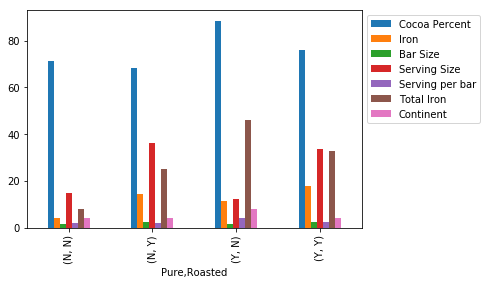

In [17]:
#visualization of pure vs roasted chocolate
pure_roast.plot.bar()
plt.legend(bbox_to_anchor=(1,1), loc=2)

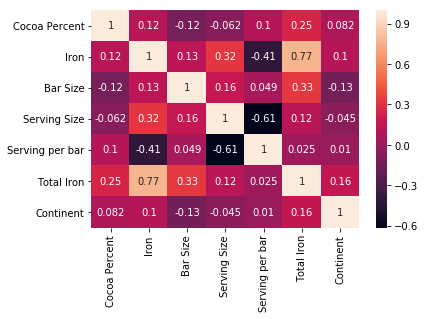

In [18]:
sns.heatmap(chocolate.corr(), annot=True)

In [19]:
list(chocolate)

['Company',
 'Cocoa Percent',
 'Broad Bean Origin',
 'Bean Type',
 'Iron',
 'Bar Size',
 'Serving Size',
 'Serving per bar',
 'Roasted',
 'Pure',
 'Total Iron',
 'Continent',
 'Source',
 'Region']

In [20]:
iron = chocolate.drop(['Company', 'Broad Bean Origin', 'Bean Type', 
                       'Roasted','Pure','Continent', 'Source', 'Region'], axis=1)

In [21]:
columns = ['cocoapercent', 'iron', 'barsize', 'servingsize', 'barservings', 'totaliron']

#change column names
iron.columns = columns
iron.head()

,cocoapercent,iron,barsize,servingsize,barservings,totaliron
0,85,15.0,2.46,35.0,2.0,30.0
1,70,30.0,3.20,30.0,3.0,90.0
2,65,25.0,3.20,30.0,3.0,75.0
3,88,30.0,3.20,30.0,3.0,90.0
4,55,20.0,3.20,30.0,3.0,60.0


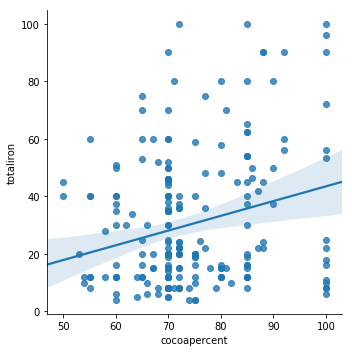

In [22]:
sns.lmplot(x='cocoapercent', y='totaliron', data=iron)

In [23]:
reg = linear_model.LinearRegression()
reg.fit(iron[['cocoapercent']],iron.totaliron)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred = reg.predict([[75]])
y_pred

array([30.68592835])

In [25]:
reg.coef_

array([0.5118471])

In [26]:
reg.intercept_

-7.702603865108699

In [27]:
#y=mx+b
y= 0.5118471*75-7.702603865108699
y

30.685928634891297

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

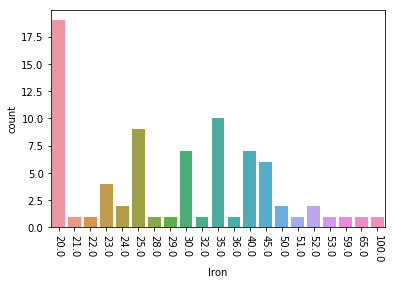

In [28]:
sns.countplot(x='Iron', data=chocolate[chocolate['Iron'] >= 20])

plt.xticks(rotation=-90)

In [43]:
#searching for best chocolate brand
chocolate.loc[(chocolate['Iron'] >= 20) & (chocolate['Pure'] == 'Y') & (chocolate['Roasted'] == 'Y')
             & (chocolate['Bean Type'] == 'Blend (forastero, trinitario)')]       

,Company,Cocoa Percent,Broad Bean Origin,Bean Type,Iron,Bar Size,Serving Size,Serving per bar,Roasted,Pure,Total Iron,Continent,Source,Region
1,Chocolove,70,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.2,30.0,3.0,Y,Y,90.0,7,High,Multi-country
2,Chocolove,65,"African, Caribbean","Blend (forastero, trinitario)",25.0,3.2,30.0,3.0,Y,Y,75.0,7,High,Multi-country
3,Chocolove,88,"African, Caribbean","Blend (forastero, trinitario)",30.0,3.2,30.0,3.0,Y,Y,90.0,7,High,Multi-country
4,Chocolove,55,"African, Caribbean","Blend (forastero, trinitario)",20.0,3.2,30.0,3.0,Y,Y,60.0,7,High,Multi-country
5,Chocolove,77,"African, Caribbean","Blend (forastero, trinitario)",25.0,3.2,30.0,3.0,Y,Y,75.0,7,High,Multi-country
